C:\Users\bagir\AppData\Local\Temp\ipykernel_34520\2486413944.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')


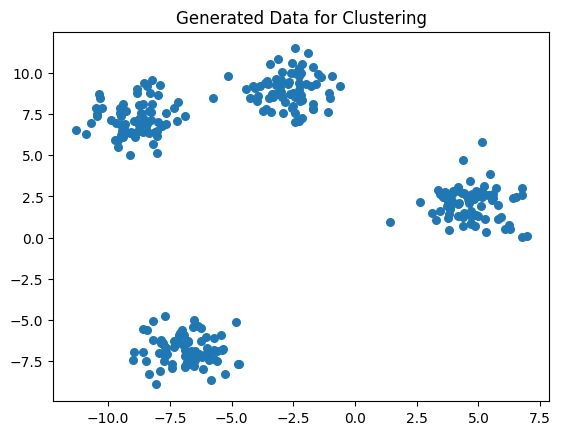

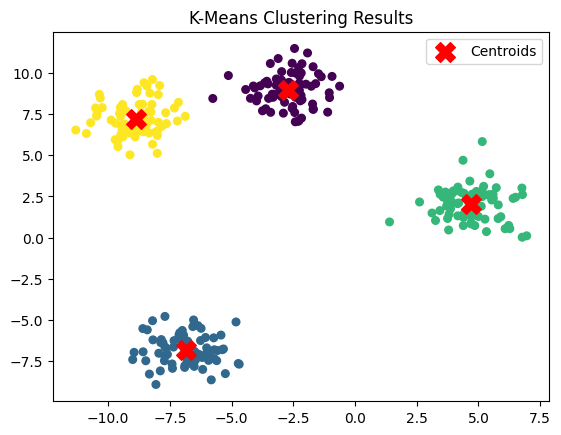

Cluster Centers:
 [[-2.70981136  8.97143336]
 [-6.83235205 -6.83045748]
 [ 4.7182049   2.04179676]
 [-8.87357218  7.17458342]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Generated Data for Clustering')
plt.show()

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Get the cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()

# Print the cluster centers
print("Cluster Centers:\n", centers)


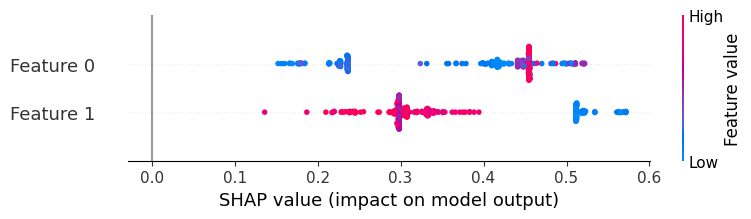

In [14]:
from sklearn.ensemble import RandomForestClassifier
import shap

# Train a classifier to predict the cluster labels
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X, labels)

# you predict like this. the output is one of the clusters, not a probability.
predicted_labels = classifier.predict(X)

# Initialize SHAP Explainer for the classifier
explainer = shap.TreeExplainer(classifier)

# Get SHAP values for a subset of data
shap_values = explainer.shap_values(X)

# Visualize the SHAP values for the predicted classes
shap.summary_plot(shap_values[np.arange(len(labels)), :, labels], X)  
